# King County House Prices-Project Module 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [257]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0         NaN   0.0     ...          7        1180   
1      7242     2.0         0.0   0.0     ...          7        2170   
2     10000     1.0         0.0   0.0     ...          6         770   
3      5000     1.0         0.0   0.0     ...          7        1050   
4      8080     1.0         0.0   0.0     ...          8        1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [259]:
'''
Get the number of NAs for a DataFrame
'''

def print_NAs(dataframe):
    for column in dataframe:
        num_nas = dataframe[column].isna().sum()
        if num_nas > 0:
            print('Found {0} \t NAs in column \t{1} ({2:0.2f}%)'.format(num_nas, column, 100.*num_nas/len(df)))

In [260]:
print_NAs(df)

Found 2376 	 NAs in column 	waterfront (11.00%)
Found 63 	 NAs in column 	view (0.29%)
Found 3842 	 NAs in column 	yr_renovated (17.79%)


In [153]:
df.shape

(21597, 21)

/Users/angelmanzur/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/angelmanzur/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


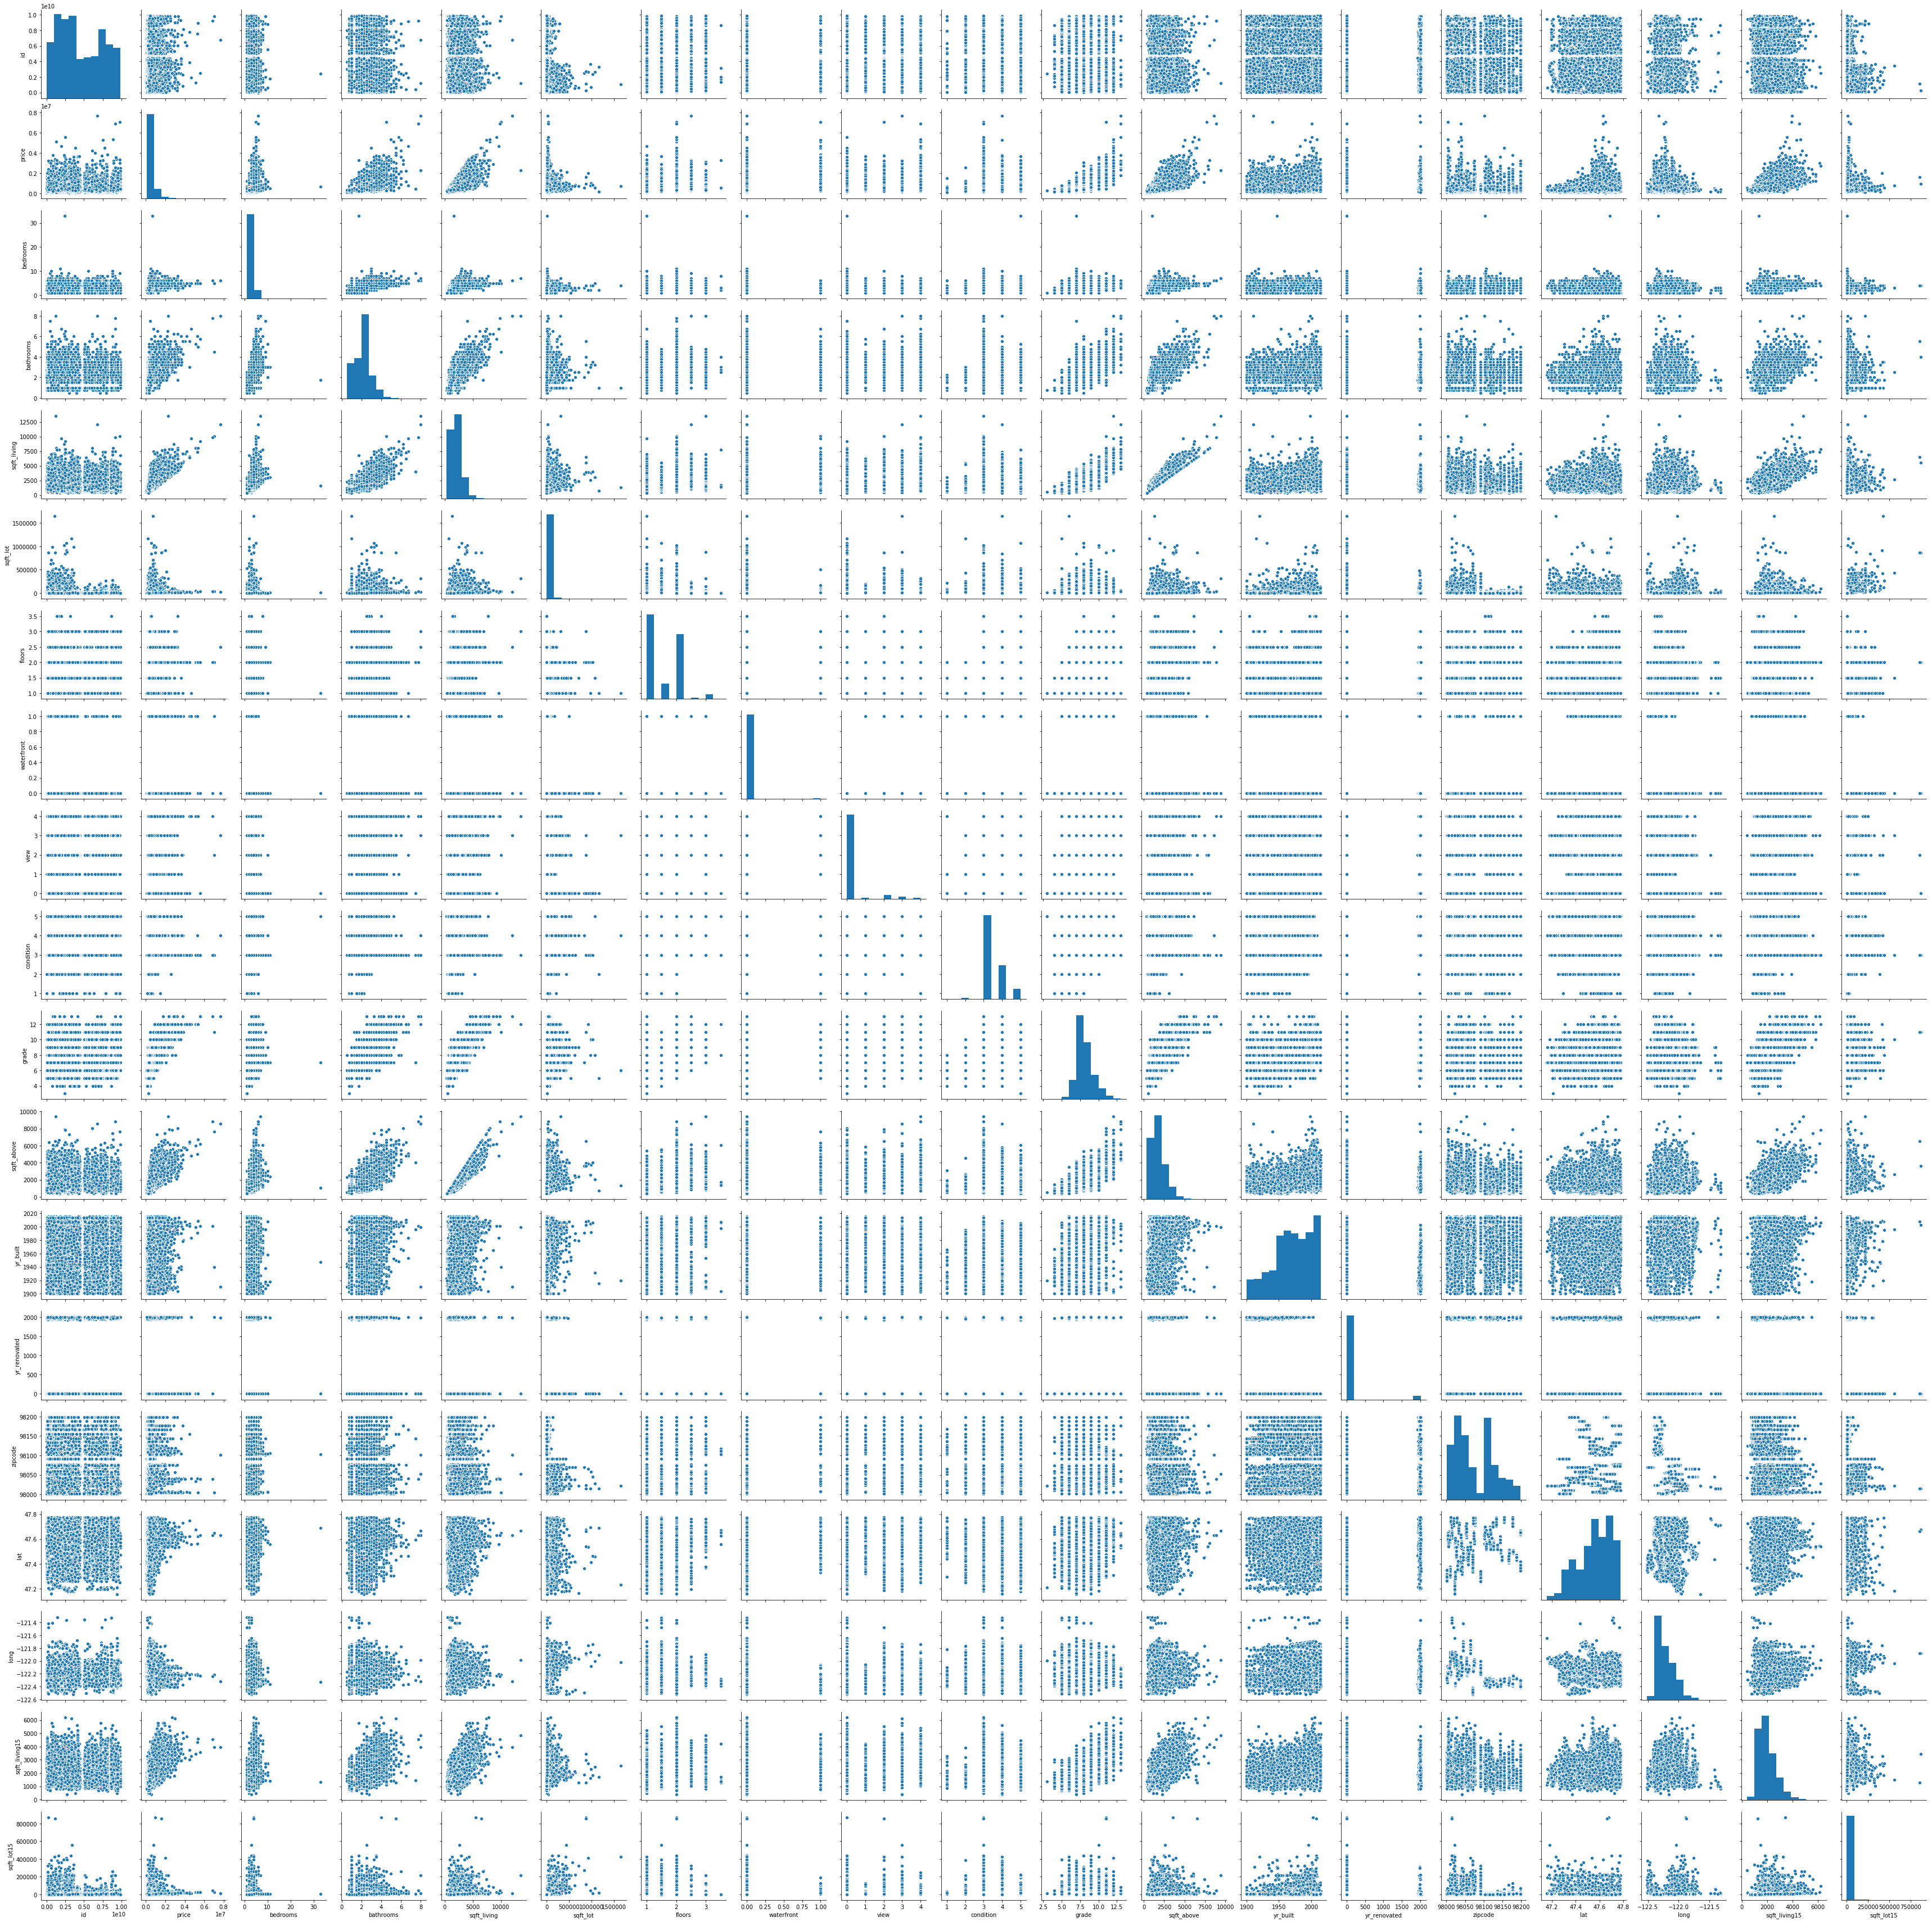

In [43]:
g = sns.pairplot(df)

13

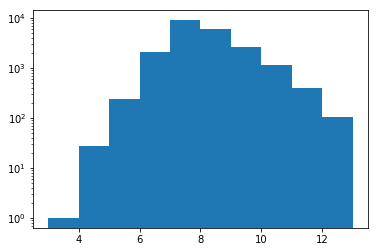

In [93]:
plt.hist(df.grade,log='True');
df.grade.max()

### find which variables are categorical



In [261]:
cat_columns = []
for cols in df.columns:
    if df[cols].nunique()<50:
        cat_columns.append(cols)
        print('Category: {1} \t has {0} Unique values '.format(df[cols].nunique(), cols))
ncat_variables = len(cat_columns)

Category: bedrooms 	 has 12 Unique values 
Category: bathrooms 	 has 29 Unique values 
Category: floors 	 has 6 Unique values 
Category: waterfront 	 has 2 Unique values 
Category: view 	 has 5 Unique values 
Category: condition 	 has 5 Unique values 
Category: grade 	 has 11 Unique values 


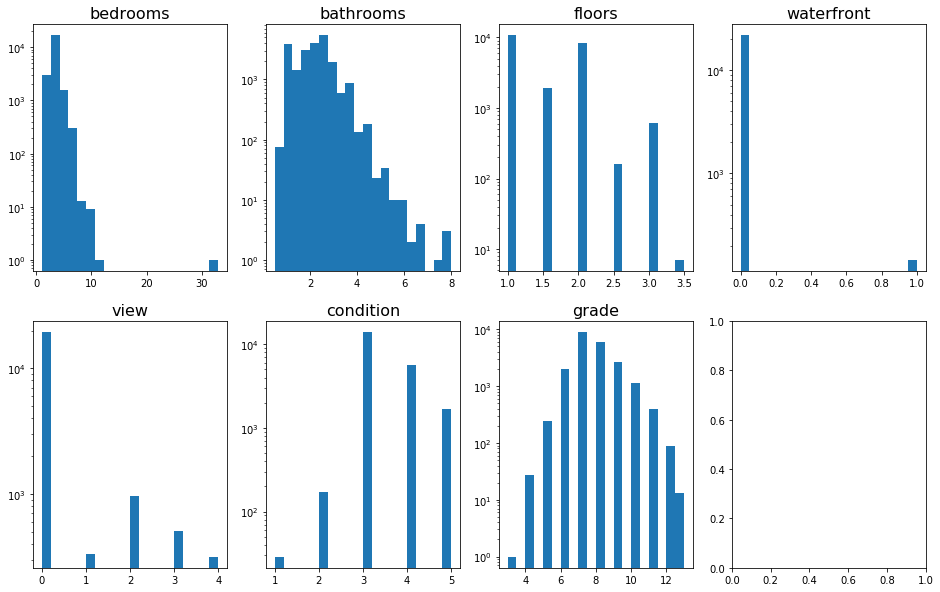

In [248]:
fig, axs = plt.subplots(2,4,figsize=(16,10))
for index, colname in enumerate(cat_columns):
    i = index//4
    j = index%4
    axs[i,j] = plt.subplot(2,4,index+1)
    plt.hist(df[colname],bins=20,log=True)
    plt.title(colname,fontsize=16)

#### Make number of bathroom categorical, but reduce the number of categories

## Special cases

There is a property with >30 bedrooms! but upon inspection it only has 1.75 bathrooms, and 1620 sq ft of living area, the 33 must be a typo. Remove

In [264]:
df[df['bedrooms']>9]

id        date      price  bedrooms bathrooms  sqft_living  \
8748   1773100755   8/21/2014   520000.0        11    (2, 4]         3000   
13301   627300145   8/14/2014  1150000.0        10    (4, 8]         4590   
15147  5566100170  10/29/2014   650000.0        10    (1, 2]         3610   
15856  2402100895   6/25/2014   640000.0        33    (1, 2]         1620   
19239  8812401450  12/29/2014   660000.0        10    (2, 4]         2920   

       sqft_lot  floors  waterfront  view     ...        grade sqft_above  \
8748       4960     2.0         0.0   0.0     ...       (6, 8]       2400   
13301     10920     1.0         0.0   2.0     ...      (8, 10]       2500   
15147     11914     2.0         0.0   0.0     ...       (6, 8]       3010   
15856      6000     1.0         0.0   0.0     ...       (6, 8]       1040   
19239      3745     2.0         0.0   0.0     ...       (6, 8]       1860   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
8748           600.0     1918        1999.0    98106  47.5560 -122.363   
13301         2090.0     2008           0.0    98004  47.5861 -122.113   
15147          600.0     1958           0.0    98006  47.5705 -122.175   
15856          580.0     1947           0.0    98103  47.6878 -122.331   
19239         1060.0     1913           0.0    98105  47.6635 -122.320   

       sqft_living15  sqft_lot15  
8748            1420        4960  
13301           2730       10400  
15147           2040       11914  
15856           1330        4700  
19239           1810        3745  

[5 rows x 21 columns]

In [265]:
q0_cut = df.bedrooms<30

In [266]:
df = df[q0_cut]

### Dropping some entries
`id` the id should have no impact

In [267]:
df.drop(['id'],axis=1,inplace=True)

In [268]:
df.drop(['sqft_basement'], axis=1, inplace=True)

In [269]:
df.head()

date     price  bedrooms bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900.0         3    (0, 1]         1180      5650     1.0   
1   12/9/2014  538000.0         3    (2, 4]         2570      7242     2.0   
2   2/25/2015  180000.0         2    (0, 1]          770     10000     1.0   
3   12/9/2014  604000.0         4    (2, 4]         1960      5000     1.0   
4   2/18/2015  510000.0         3    (1, 2]         1680      8080     1.0   

   waterfront  view  condition   grade  sqft_above  yr_built  yr_renovated  \
0         NaN   0.0          3  (6, 8]        1180      1955           0.0   
1         0.0   0.0          3  (6, 8]        2170      1951        1991.0   
2         0.0   0.0          3  (2, 6]         770      1933           NaN   
3         0.0   0.0          5  (6, 8]        1050      1965           0.0   
4         0.0   0.0          3  (6, 8]        1680      1987           0.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

/Users/angelmanzur/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/angelmanzur/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


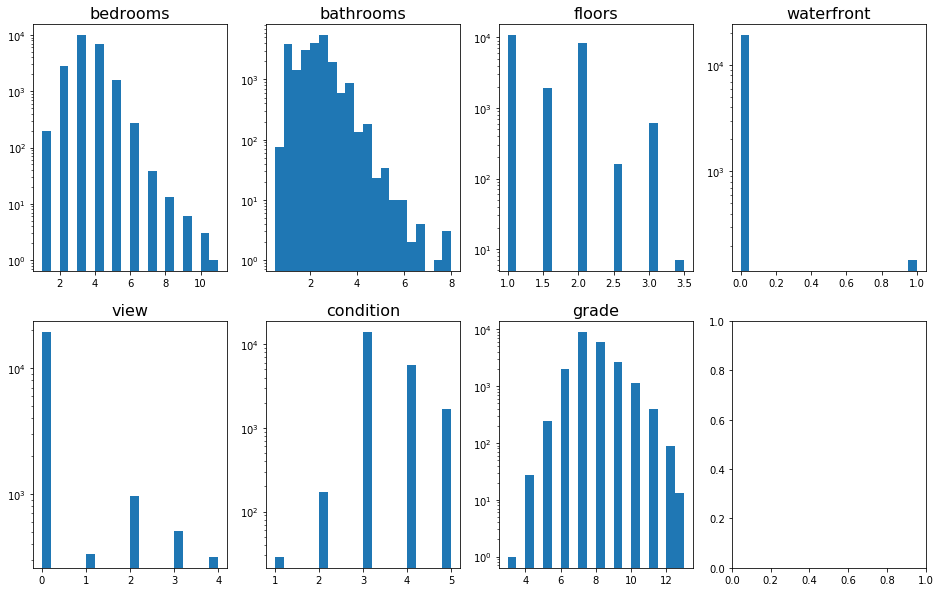

In [165]:
fig, axs = plt.subplots(2,4,figsize=(16,10))
for index, colname in enumerate(cat_columns):
    i = index//4
    j = index%4
    axs[i,j] = plt.subplot(2,4,index+1)
    plt.hist(df[colname],bins=20,log=True)
    plt.title(colname,fontsize=16)

In [124]:
# df.columns

# #convert sqft_basement from string to number
# df_sqft = df[['sqft_living','sqft_basement','sqft_above'] ]
# df_sqft.head()

# df['sqft_basement_num'] = df_sqft['sqft_basement'].apply(lambda x: convert_2_float(x))

sqft_basement is a string and has several entries set as ?
sqft_living = sqft_above + sqft_basement

I suggest recalculating  sqft_basement as sqft_living - sqft_basement and dropping the sqft_living from the dataset

We can also add a variable has basement instead

Text(0, 0.5, 'sq ft Basement')

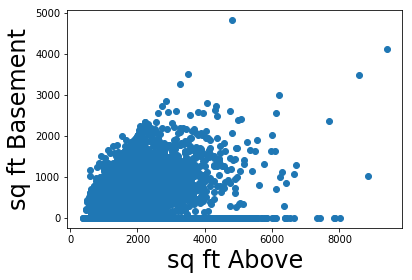

In [270]:
# plt.scatter(df['sqft_above'], df['sqft_living'])
df['sqft_basement'] = df['sqft_living'] - df['sqft_above']
plt.scatter(df['sqft_above'], df['sqft_basement'])
plt.xlabel('sq ft Above',fontsize=24)
plt.ylabel('sq ft Basement',fontsize=24)

In [271]:
df.head()

date     price  bedrooms bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900.0         3    (0, 1]         1180      5650     1.0   
1   12/9/2014  538000.0         3    (2, 4]         2570      7242     2.0   
2   2/25/2015  180000.0         2    (0, 1]          770     10000     1.0   
3   12/9/2014  604000.0         4    (2, 4]         1960      5000     1.0   
4   2/18/2015  510000.0         3    (1, 2]         1680      8080     1.0   

   waterfront  view  condition   grade  sqft_above  yr_built  yr_renovated  \
0         NaN   0.0          3  (6, 8]        1180      1955           0.0   
1         0.0   0.0          3  (6, 8]        2170      1951        1991.0   
2         0.0   0.0          3  (2, 6]         770      1933           NaN   
3         0.0   0.0          5  (6, 8]        1050      1965           0.0   
4         0.0   0.0          3  (6, 8]        1680      1987           0.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  sqft_basement  
0    98178  47.5112 -122.257           1340        5650              0  
1    98125  47.7210 -122.319           1690        7639            400  
2    98028  47.7379 -122.233           2720        8062              0  
3    98136  47.5208 -122.393           1360        5000            910  
4    98074  47.6168 -122.045           1800        7503              0

In [174]:
df[(df.sqft_living > df.sqft_lot) & (df.sqft_basement==0) &(df.floors<1.2) ]

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
13265  7/11/2014  370000.0         3        1.0         1170      1105   

       floors  waterfront  view  condition  grade  sqft_above  yr_built  \
13265     1.0         NaN   0.0          3      7        1170      1965   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
13265           0.0    98126  47.5448 -122.375           1380        1399   

       sqft_basement  
13265              0

## NA values

### Replace views to the mode

In [272]:

view_mode = df['view'].mode()
print(view_mode[0])
df['view'].fillna(value=view_mode[0],inplace=True)


0.0


In [273]:
print_NAs(df)

Found 2376 	 NAs in column 	waterfront (11.00%)
Found 3842 	 NAs in column 	yr_renovated (17.79%)


In [274]:
df['waterfront'].unique()

array([nan,  0.,  1.])

In [275]:
water_mode = df['view'].mode()
print(water_mode[0])
df['waterfront'].fillna(value=water_mode[0],inplace=True)

0.0


In [276]:
print_NAs(df)

Found 3842 	 NAs in column 	yr_renovated (17.79%)


In [291]:
df.waterfront = df.waterfront.astype(bool)

In [ ]:
df['grade'] = pd.cut(df['grade'],bins=[2,6,8,10,14])
df['bathrooms'] = pd.cut(df['bathrooms'],bins=[0,1,2,4,8])

In [328]:
water_df = pd.get_dummies(df['waterfront'],prefix='waterfront')
water_df.drop(['waterfront_False'],axis=1,inplace=True)
water_df.head()

waterfront_True
0                0
1                0
2                0
3                0
4                0

In [330]:
df['grade'].unique()
grade_df = pd.get_dummies(df['grade'], prefix='grade')
grade_df.drop(['grade_(10, 14]'],axis=1, inplace=True)
grade_df.head(2)

grade_(2, 6]  grade_(6, 8]  grade_(8, 10]
0             0             1              0
1             0             1              0

In [335]:
df['bathrooms'].unique()
bath_df = pd.get_dummies(df['bathrooms'], prefix='bathrooms')
bath_df.drop(['bathrooms_(4, 8]'],axis=1, inplace=True)
bath_df.head(10)

bathrooms_(0, 1]  bathrooms_(1, 2]  bathrooms_(2, 4]
0                 1                 0                 0
1                 0                 0                 1
2                 1                 0                 0
3                 0                 0                 1
4                 0                 1                 0
5                 0                 0                 0
6                 0                 0                 1
7                 0                 1                 0
8                 1                 0                 0
9                 0                 0                 1

In [343]:
frames = [df, water_df, bath_df, grade_df]

king_df = pd.concat(frames,axis=1)

In [344]:
king_df.head()

date     price  bedrooms bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900.0         3    (0, 1]         1180      5650     1.0   
1   12/9/2014  538000.0         3    (2, 4]         2570      7242     2.0   
2   2/25/2015  180000.0         2    (0, 1]          770     10000     1.0   
3   12/9/2014  604000.0         4    (2, 4]         1960      5000     1.0   
4   2/18/2015  510000.0         3    (1, 2]         1680      8080     1.0   

   waterfront  view  condition      ...       sqft_living15  sqft_lot15  \
0       False   0.0          3      ...                1340        5650   
1       False   0.0          3      ...                1690        7639   
2       False   0.0          3      ...                2720        8062   
3       False   0.0          5      ...                1360        5000   
4       False   0.0          3      ...                1800        7503   

   sqft_basement  waterfront_True  bathrooms_(0, 1]  bathrooms_(1, 2]  \
0              0                0                 1                 0   
1            400                0                 0                 0   
2              0                0                 1                 0   
3            910                0                 0                 0   
4              0                0                 0                 1   

   bathrooms_(2, 4]  grade_(2, 6]  grade_(6, 8]  grade_(8, 10]  
0                 0             0             1              0  
1                 1             0             1              0  
2                 0             1             0              0  
3                 1             0             1              0  
4                 0             0             1              0  

[5 rows x 27 columns]

#### drop the original categorical variables

In [345]:
king_df.drop(['bathrooms', 'waterfront','grade'],axis=1, inplace=True) 

In [347]:
king_df.head()

date     price  bedrooms  sqft_living  sqft_lot  floors  view  \
0  10/13/2014  221900.0         3         1180      5650     1.0   0.0   
1   12/9/2014  538000.0         3         2570      7242     2.0   0.0   
2   2/25/2015  180000.0         2          770     10000     1.0   0.0   
3   12/9/2014  604000.0         4         1960      5000     1.0   0.0   
4   2/18/2015  510000.0         3         1680      8080     1.0   0.0   

   condition  sqft_above  yr_built      ...        sqft_living15  sqft_lot15  \
0          3        1180      1955      ...                 1340        5650   
1          3        2170      1951      ...                 1690        7639   
2          3         770      1933      ...                 2720        8062   
3          5        1050      1965      ...                 1360        5000   
4          3        1680      1987      ...                 1800        7503   

   sqft_basement  waterfront_True  bathrooms_(0, 1]  bathrooms_(1, 2]  \
0              0                0                 1                 0   
1            400                0                 0                 0   
2              0                0                 1                 0   
3            910                0                 0                 0   
4              0                0                 0                 1   

   bathrooms_(2, 4]  grade_(2, 6]  grade_(6, 8]  grade_(8, 10]  
0                 0             0             1              0  
1                 1             0             1              0  
2                 0             1             0              0  
3                 1             0             1              0  
4                 0             0             1              0  

[5 rows x 24 columns]

In [361]:
print_NAs(king_df)

Found 3842 	 NAs in column 	yr_renovated (17.79%)


In [362]:
king_df.describe()

price      bedrooms   sqft_living      sqft_lot        floors  \
count  2.159600e+04  21596.000000  21596.000000  2.159600e+04  21596.000000   
mean   5.402920e+05      3.371828   2080.343165  1.509983e+04      1.494119   
std    3.673760e+05      0.904114    918.122038  4.141355e+04      0.539685   
min    7.800000e+04      1.000000    370.000000  5.200000e+02      1.000000   
25%    3.220000e+05      3.000000   1430.000000  5.040000e+03      1.000000   
50%    4.500000e+05      3.000000   1910.000000  7.619000e+03      1.500000   
75%    6.450000e+05      4.000000   2550.000000  1.068550e+04      2.000000   
max    7.700000e+06     11.000000  13540.000000  1.651359e+06      3.500000   

               view     condition    sqft_above      yr_built  yr_renovated  \
count  21596.000000  21596.000000  21596.000000  21596.000000  17754.000000   
mean       0.233191      3.409752   1788.631506   1971.000787     83.641489   
std        0.764689      0.650471    827.763251     29.375460    399.957185   
min        0.000000      1.000000    370.000000   1900.000000      0.000000   
25%        0.000000      3.000000   1190.000000   1951.000000      0.000000   
50%        0.000000      3.000000   1560.000000   1975.000000      0.000000   
75%        0.000000      4.000000   2210.000000   1997.000000      0.000000   
max        4.000000      5.000000   9410.000000   2015.000000   2015.000000   

           ...        sqft_living15     sqft_lot15  sqft_basement  \
count      ...         21596.000000   21596.000000   21596.000000   
mean       ...          1986.650722   12758.656649     291.711660   
std        ...           685.231768   27275.018316     442.673703   
min        ...           399.000000     651.000000       0.000000   
25%        ...          1490.000000    5100.000000       0.000000   
50%        ...          1840.000000    7620.000000       0.000000   
75%        ...          2360.000000   10083.000000     560.000000   
max        ...          6210.000000  871200.000000    4820.000000   

       waterfront_True  bathrooms_(0, 1]  bathrooms_(1, 2]  bathrooms_(2, 4]  \
count     21596.000000      21596.000000      21596.000000      21596.000000   
mean          0.006761          0.181793          0.297787          0.508103   
std           0.081946          0.385683          0.457296          0.499946   
min           0.000000          0.000000          0.000000          0.000000   
25%           0.000000          0.000000          0.000000          0.000000   
50%           0.000000          0.000000          0.000000          1.000000   
75%           0.000000          0.000000          1.000000          1.000000   
max           1.000000          1.000000          1.000000          1.000000   

       grade_(2, 6]  grade_(6, 8]  grade_(8, 10]  
count  21596.000000  21596.000000   21596.000000  
mean       0.106872      0.696333       0.173597  
std        0.308957      0.459851       0.378771  
min        0.000000      0.000000       0.000000  
25%        0.000000      0.000000       0.000000  
50%        0.000000      1.000000       0.000000  
75%        0.000000      1.000000       0.000000  
max        1.000000      1.000000       1.000000  

[8 rows x 23 columns]

In [389]:
cols_names = king_df.columns
print(cols_names)

Index(['date', 'price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'sqft_above', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'sqft_basement', 'waterfront_True', 'bathrooms_(0, 1]',
       'bathrooms_(1, 2]', 'bathrooms_(2, 4]', 'grade_(2, 6]', 'grade_(6, 8]',
       'grade_(8, 10]'],
      dtype='object')


In [395]:
cols_toplot = [ 'bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'yr_renovated',
       'zipcode', 'sqft_living15', 'sqft_lot15',
       'sqft_basement']

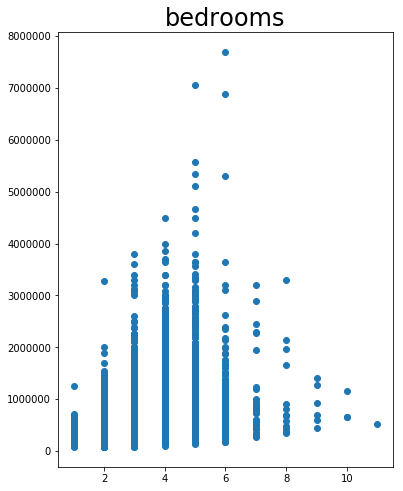

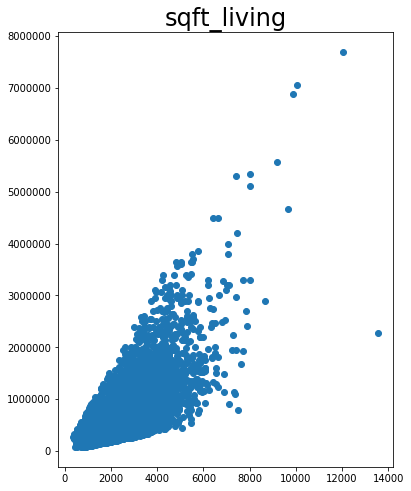

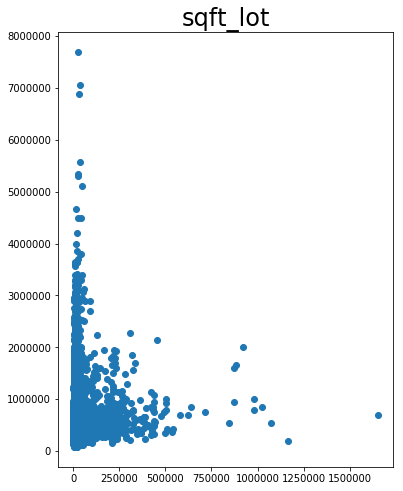

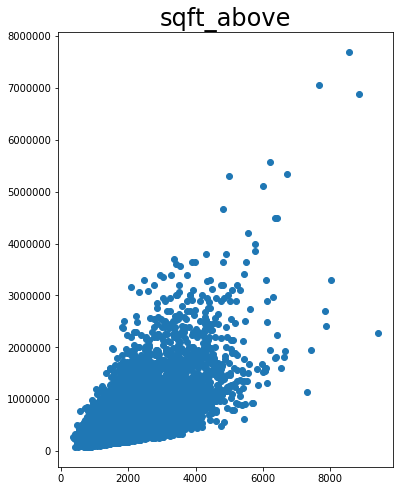

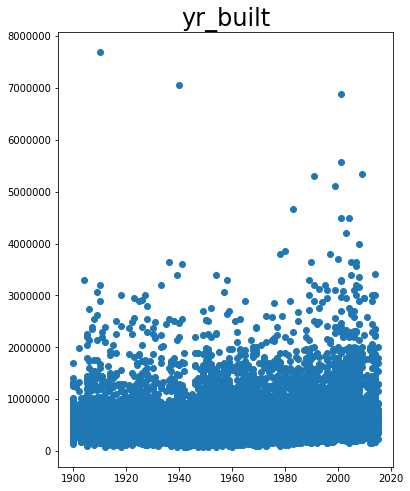

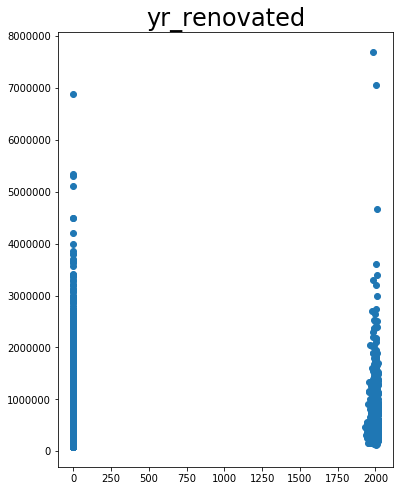

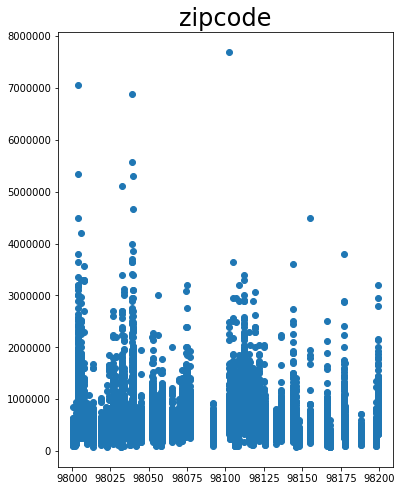

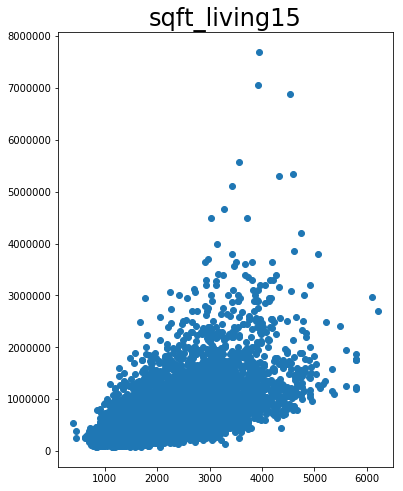

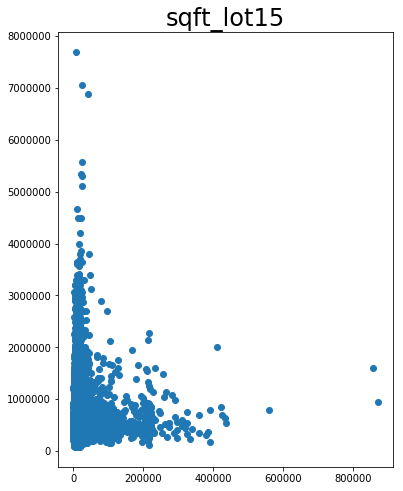

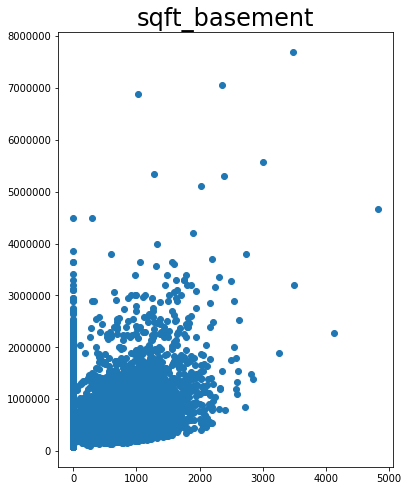

In [396]:
for cols in king_df:
    if cols in cols_toplot:
        fig = plt.figure(figsize=(6,8))
        plt.scatter(king_df[cols], king_df['price'])
        plt.title(cols,fontsize=24)

In [406]:
cols_tolog = [ 'sqft_living', 'sqft_lot', 'sqft_above',  'sqft_living15', 'sqft_lot15']

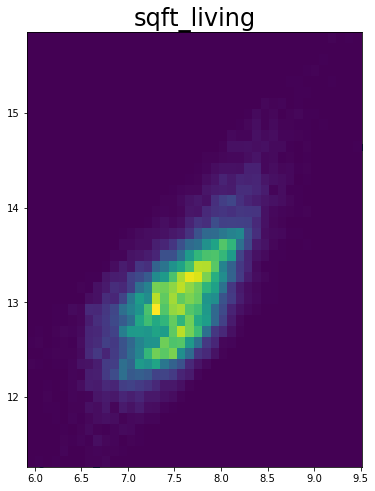

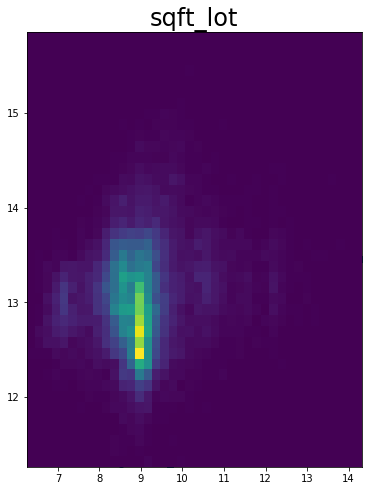

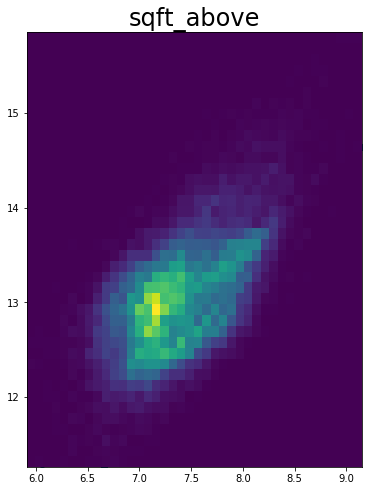

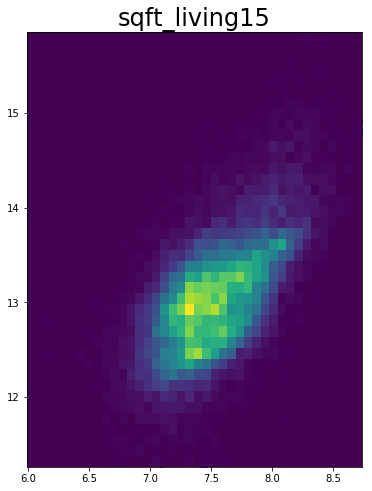

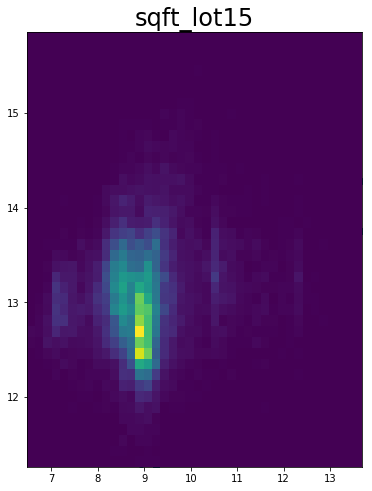

In [407]:
for cols in king_df:
    if cols in cols_tolog:
        fig = plt.figure(figsize=(6,8))
        plt.scatter(np.log(king_df[cols]), np.log(king_df['price']))
        plt.title(cols,fontsize=24)
        plt.hist2d( np.log(king_df[cols]), np.log(king_df['price']),bins=40)
#         sns.lmplot(np.log(king_df[cols]), np.log(king_df['price']))

In [408]:
cols_tostand = [ 'sqft_living', 'sqft_lot', 'sqft_above',  'sqft_living15', 'sqft_lot15']

In [409]:
def standarized(data):
    return (data-np.mean(data))/np.std(data)

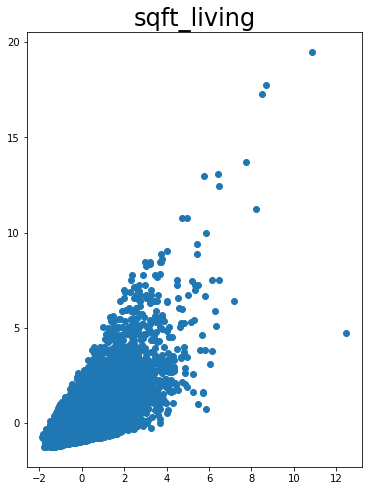

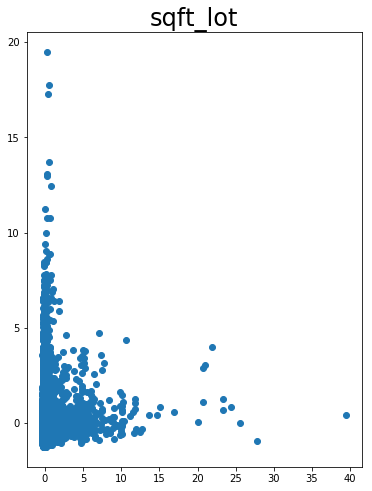

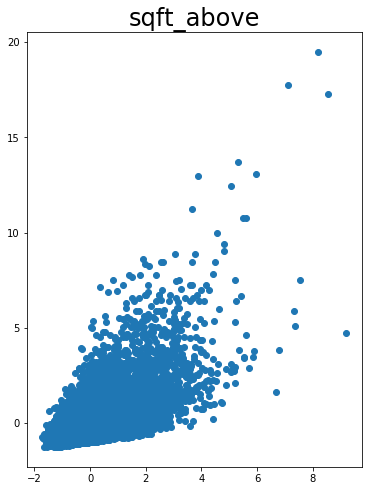

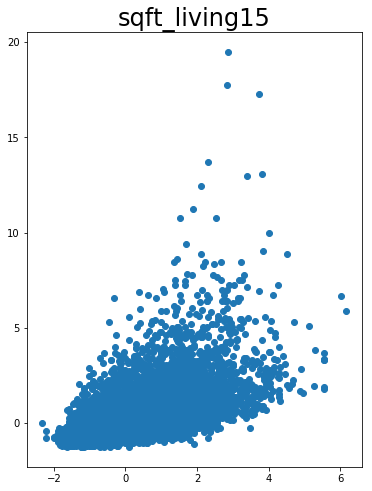

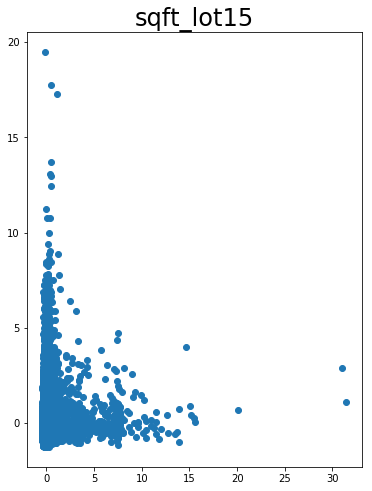

In [412]:
for cols in king_df:
    if cols in cols_tostand:
        fig = plt.figure(figsize=(6,8))
        plt.scatter(standarized(king_df[cols]), standarized(king_df['price']))
        plt.title(cols,fontsize=24)
#         plt.hist2d( standarized(king_df[cols]), standarized(king_df['price']),bins=40)

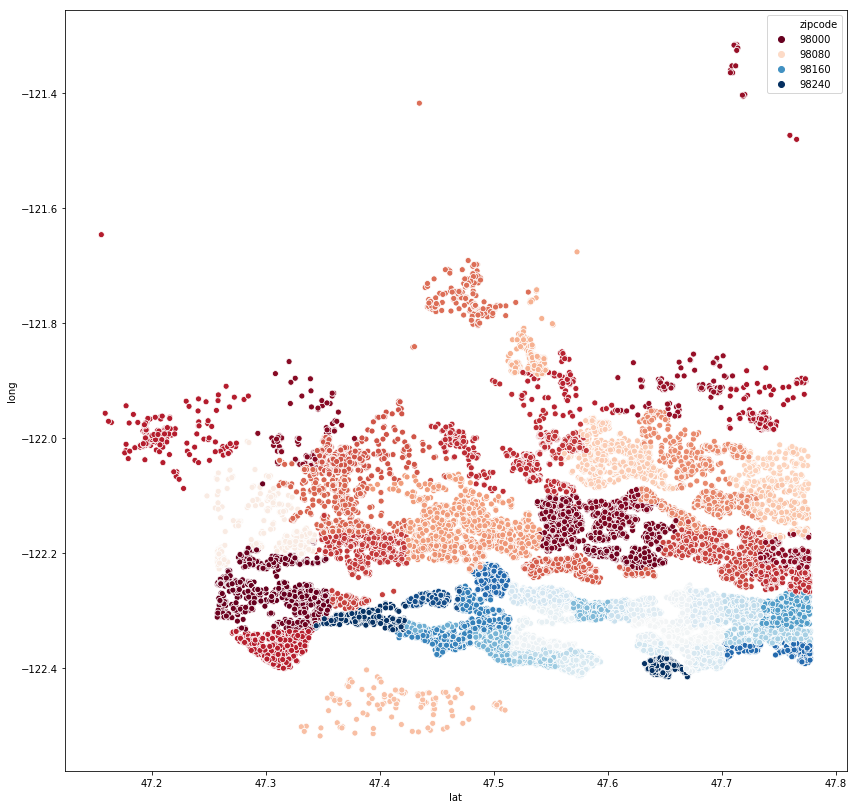

In [383]:
fig = plt.figure(figsize=(14, 14))
sns.scatterplot(x='lat', y='long',hue='zipcode',data=king_df,palette='RdBu')


In [1]:
fig = plt.figure(figsize=(14, 14))
sns.scatterplot(x='long', y='lat',hue='price',data=king_df,palette='Blues')


NameError: name 'plt' is not defined

In [415]:
cols_tolog + ['price']

['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_living15',
 'sqft_lot15',
 'price']

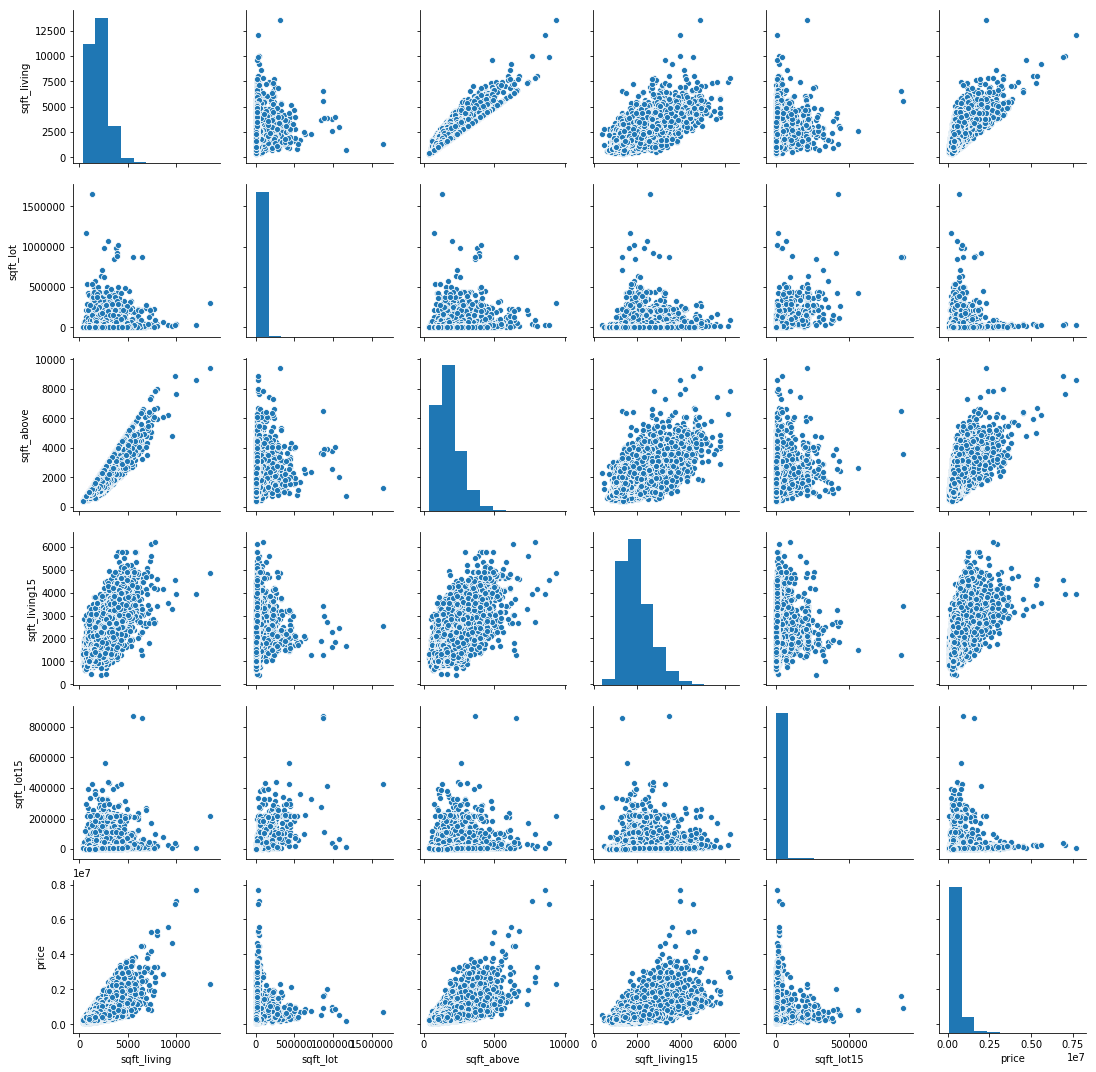

In [416]:
g = sns.pairplot(king_df[cols_tolog+['price']])

In [465]:
cols_tolog
for cols in cols_tolog:
    king_df[cols] = np.log(king_df[cols])

# Lets look at which variables give a good p value

In [469]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    print('initial tests',included)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
#         print('excluded:' , excluded,len(excluded))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
#             print('fitting with ',len(X[included+[new_column]].columns),' columns')
            
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
#             new_tval[new_column] = mod
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
#         input('hit enter, for backward')
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        
#         print('worst pvalue: ',worst_pval)
        if not changed:
            break
            
    return included

In [467]:
king_df.columns

Index(['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition',
       'sqft_above', 'sqft_living15', 'sqft_lot15', 'sqft_basement',
       'waterfront_True', 'bathrooms_(0, 1]', 'bathrooms_(1, 2]',
       'bathrooms_(2, 4]', 'grade_(2, 6]', 'grade_(6, 8]', 'grade_(8, 10]'],
      dtype='object')

In [419]:
y = king_df['price']

In [420]:
king_df.drop('price', axis=1, inplace=True)

In [453]:
king_df.drop(['long','lat','zipcode'], axis=1, inplace=True)

In [455]:
king_df.drop(['yr_built'], axis=1, inplace=True)

In [456]:
king_df.columns

Index(['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition',
       'sqft_above', 'sqft_living15', 'sqft_lot15', 'sqft_basement',
       'waterfront_True', 'bathrooms_(0, 1]', 'bathrooms_(1, 2]',
       'bathrooms_(2, 4]', 'grade_(2, 6]', 'grade_(6, 8]', 'grade_(8, 10]'],
      dtype='object')

In [431]:
king_df.drop('yr_renovated',axis=1,inplace=True)
king_df.drop('date',axis=1,inplace=True)
# Removing year built but could set the year renovated same as year built

In [503]:
X=king_df
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 14 columns):
bedrooms            21596 non-null int64
sqft_living         21596 non-null float64
sqft_lot            21596 non-null float64
floors              21596 non-null float64
view                21596 non-null float64
condition           21596 non-null int64
sqft_basement       21596 non-null int64
waterfront_True     21596 non-null uint8
bathrooms_(0, 1]    21596 non-null uint8
bathrooms_(1, 2]    21596 non-null uint8
bathrooms_(2, 4]    21596 non-null uint8
grade_(2, 6]        21596 non-null uint8
grade_(6, 8]        21596 non-null uint8
grade_(8, 10]       21596 non-null uint8
dtypes: float64(4), int64(3), uint8(7)
memory usage: 2.1 MB


In [512]:
result = stepwise_selection(X, y, verbose = True)

initial tests []
Add  view                           with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  grade_(6, 8]                   with p-value 0.0
Add  grade_(2, 6]                   with p-value 2.29116e-181
Add  grade_(8, 10]                  with p-value 0.0
Add  waterfront_True                with p-value 1.64689e-168
Add  condition                      with p-value 4.849e-87
Add  sqft_lot                       with p-value 4.52462e-80
Add  bathrooms_(2, 4]               with p-value 2.95468e-55
Add  bathrooms_(1, 2]               with p-value 5.53119e-83
Add  bathrooms_(0, 1]               with p-value 6.26595e-65
Add  bedrooms                       with p-value 2.19458e-15


In [513]:
print(len(result))

king_df.shape

12


(21596, 12)

In [480]:
king_df.drop('sqft_lot15',axis=1, inplace=True)

In [509]:
# king_df.drop('sqft_above',axis=1, inplace=True)
# king_df.drop('sqft_basement',axis=1, inplace=True)
# king_df.drop('sqft_living15',axis=1, inplace=True)
king_df.drop('floors',axis=1, inplace=True)

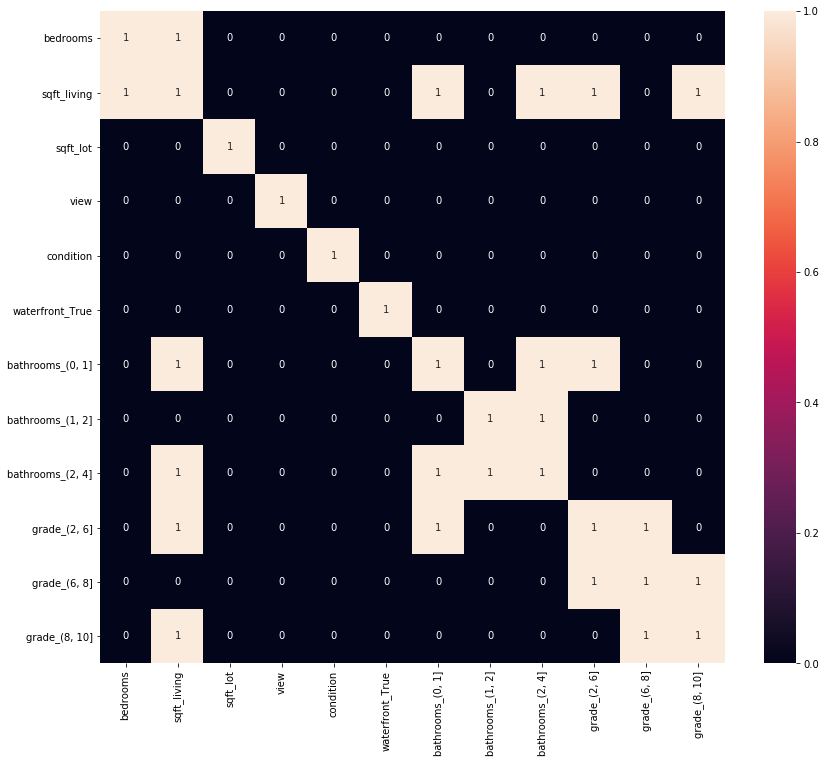

In [511]:
fig = plt.figure(figsize=(14,12))
sns.heatmap(np.abs(king_df.corr())>0.4, annot=True)

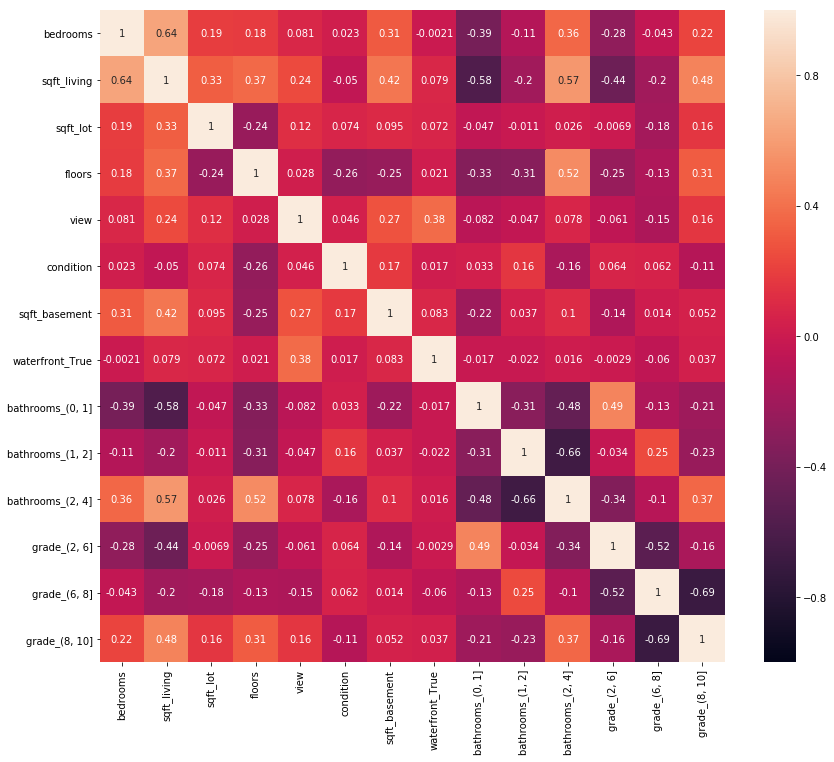

In [497]:

fig = plt.figure(figsize=(14,12))
sns.heatmap(king_df.corr(),vmin=-1,vmax=1,annot=True)

In [450]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     2609.
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        22:03:19   Log-Likelihood:            -2.9410e+05
No. Observations:               21596   AIC:                         5.882e+05
Df Residuals:                   21575   BIC:                         5.884e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6.639e+06   2.89e+06      2.297      0.022    9.73e+05    1.23e+07
bedrooms         -2.903e+04   1968.920    -14.744      0.000   -3.29e+04   -2.52e+04
sqft_living        118.3657      2.151     55.018      0.000     114.149     122.583
sqft_lot             0.1423      0.047      3.006      0.003       0.050       0.235
floors            4.518e+04   3636.481     12.425      0.000    3.81e+04    5.23e+04
view              5.379e+04   2093.925     25.687      0.000    4.97e+04    5.79e+04
condition         3.108e+04   2302.245     13.501      0.000    2.66e+04    3.56e+04
sqft_above          60.6452      2.282     26.571      0.000      56.172      65.119
yr_built         -1920.6425     68.764    -27.931      0.000   -2055.426   -1785.859
zipcode           -629.5787     32.661    -19.276      0.000    -693.597    -565.561
lat               6.354e+05   1.06e+04     60.137      0.000    6.15e+05    6.56e+05
long             -2.408e+05   1.29e+04    -18.618      0.000   -2.66e+05   -2.15e+05
sqft_living15       41.5078      3.397     12.220      0.000      34.850      48.166
sqft_lot15          -0.4686      0.072     -6.469      0.000      -0.611      -0.327
sqft_basement       57.7224      2.587     22.316      0.000      52.653      62.792
waterfront_True    5.92e+05   1.79e+04     33.054      0.000    5.57e+05    6.27e+05
bathrooms_(0, 1] -2.732e+05   1.54e+04    -17.725      0.000   -3.03e+05   -2.43e+05
bathrooms_(1, 2] -2.731e+05   1.45e+04    -18.837      0.000   -3.01e+05   -2.45e+05
bathrooms_(2, 4] -2.685e+05   1.36e+04    -19.713      0.000   -2.95e+05   -2.42e+05
grade_(2, 6]      -5.78e+05   1.32e+04    -43.731      0.000   -6.04e+05   -5.52e+05
grade_(6, 8]     -5.281e+05   1.17e+04    -45.146      0.000   -5.51e+05   -5.05e+05
grade_(8, 10]     -3.74e+05   1.06e+04    -35.359      0.000   -3.95e+05   -3.53e+05
==============================================================================
Omnibus:                    16152.141   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1303584.626
Skew:                           2.947   Prob(JB):                         0.00
Kurtosis:                      40.603   Cond. No.                     3.33e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.97e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [502]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

ln = LinearRegression()
selector = RFE(ln, n_features_to_select=5)
selector = selector.fit(king_df,y)

In [501]:
selector.support_

array([False,  True, False, False, False, False, False,  True, False,
       False, False,  True,  True,  True])